**Unsupervised Learning**

![](https://drive.google.com/uc?export=view&id=1O1v4eOtTLGIOFwxl1S6SPOmCYVuxmU1m)

Source: https://www.edureka.co/blog/introduction-to-machine-learning/

**K-Means Clustering Example**
![](https://miro.medium.com/proxy/0*G7LC_oXt4mNzavMe.jpg)

Source: https://medium.com/@fauziyahdewi16/k-means-clustering-with-scikit-learn-in-python-b8e7835d9753

# Import Library

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords_scratch

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Cleansing

In [2]:
# panggil stopword id
list_stopwords = stopwords_scratch.words('indonesian')
# panggil stopword en
list_stopwords_en = stopwords_scratch.words('english')
# gabungkan id & en
list_stopwords.extend(list_stopwords_en)
# tambah daftar stopword jika perlu
list_stopwords.extend(['ya', 'yg', 'ga', 'yuk', 'dah', 'ngga', 'engga', 'ygy'])
stopwords = list_stopwords

In [3]:
import re

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    # Menghapus RT
    string = re.sub(r'rt', '', string)
    return string

In [4]:
stopwords[:3]

['ada', 'adalah', 'adanya']

# Upload Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
document = pd.read_csv('drive/My Drive/Python/NLP/2024-nlp/tapera/tapera.csv', sep=',')
document = document.rename(columns={'full_text': 'Tweet'})


In [7]:
document['Tweet'] = document.Tweet.apply(cleansing)
document.head()

,conversation_id_str,created_at,favorite_count,Tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1802857867214758354,Tue Jun 18 00:16:25 +0000 2024,1,bp tapera tegaskan 124 960 pesea telah ditinda...,1802857867214758354,https://pbs.twimg.com/media/GQUJpQFbEAAgmg_.jpg,NaN,in,NaN,0,0,1,https://x.com/masyitaarinra/status/18028578672...,1751794736246263808,masyitaarinra
1,1802857601174261946,Tue Jun 18 00:15:22 +0000 2024,0,belom bayar tapera,1802857601174261946,NaN,NaN,in,NaN,0,0,0,https://x.com/heiythru/status/1802857601174261946,1219843146932047873,heiythru
2,1802666717635899784,Tue Jun 18 00:11:08 +0000 2024,0,kosasih0706 zy zy lestary kt projo eitss k...,1802856537590989244,NaN,Kosasih0706,in,NaN,0,0,0,https://x.com/rtobg71/status/1802856537590989244,1745326212350869504,rtobg71
3,1802855451291181403,Tue Jun 18 00:06:49 +0000 2024,0,setelah tapera pemerintah canangkan bank tanah...,1802855451291181403,NaN,NaN,in,indonesia,0,0,0,https://x.com/posaktualcom/status/180285545129...,1636627729675337734,posaktualcom
4,1802854006043423126,Tue Jun 18 00:01:05 +0000 2024,0,emak gua ngomel perkara tapera yakali pns nutu...,1802854006043423126,NaN,NaN,in,Indonesia,0,0,0,https://x.com/xooyaxee/status/1802854006043423126,1231225864722903042,xooyaxee


In [8]:
document = document.Tweet.to_list()

In [9]:
document[:10]

['bp tapera tegaskan 124 960 pesea telah ditindaklanjuti dan selesai  mbappe wisnu bawah ipk 4 daging pagii https   t co zsvrpy9wej',
 'belom bayar tapera   ',
 ' kosasih0706  zy zy lestary kt projo   eitss kita punya tapera bisa nalangin     ',
 'setelah tapera pemerintah canangkan bank tanah faisal basri  untuk siapa  https   t co khnabv3wns https   t co khnabv3wns',
 'emak gua ngomel perkara tapera yakali pns nutupin tapera yg kerja swasta',
 'cuti bersama tapera  contoh kelakuan pemerintah yang suka seenaknya mengurangi hak pekerja',
 'semangat pagi warga tapera  semangat beraktivitas hari ini    https   t co mdhgr1jnxu',
 'kasian banget orang indonesia  gaji kecil dipotong pajak bpjs kes bpjs tk nanti bakal ada tapera trus harus bagi2 lagi buat tiga keluarga pas nikah ',
 'benci banget masalah tapera masalah pajak gaji aja udh emosi ini ditambah tapera 3  dr gaji  pengen nyundut pake roko deh  ga ada yg bkin emosi kecuali duit duit',
 'makanya itu menteri kesayangan warga sebelum 

# Feature Extraction

In [10]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(document[:100])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


# Training

In [11]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [12]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# get_feature_names is deprecated in scikit-learn versions >= 0.2
# and replaced by get_feature_names_out
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
  print("Cluster %d:" % i),
  for ind in order_centroids[i, :10]:
    print(' %s' % terms[ind])
  print()

Cluster 0:
 tapera
 bayar
 co
 https
 tabungan
 zy
 aja
 ikn
 kena
 pemerintah

Cluster 1:
 dipotong
 tapera
 orang
 plisitin
 negara
 gaji
 bansos
 kerja
 tuh
 halal



# Evaluation

In [13]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels=model.predict(X))

# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
# Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

0.007795467547242966

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

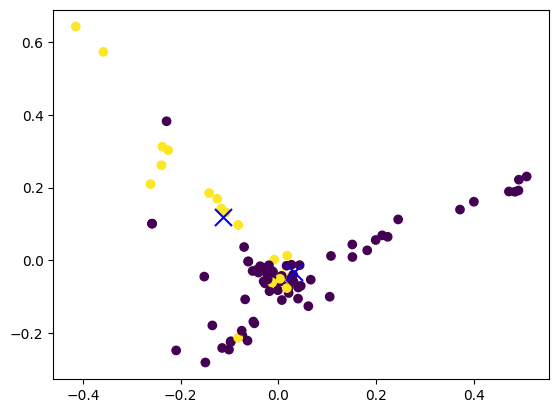

In [15]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

**Tugas**

Lakukan improve agar klaster tweets lebih insightful! Sehingga Anda bisa menyimpulkan topik apa saja yang dibahas pada dataset.

Misal: dilakukan cleansing data, mengubah jumlah klaster, dll